In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_json("https://raw.githubusercontent.com/amankharwal/Website-data/master/livedata.json")

In [4]:
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


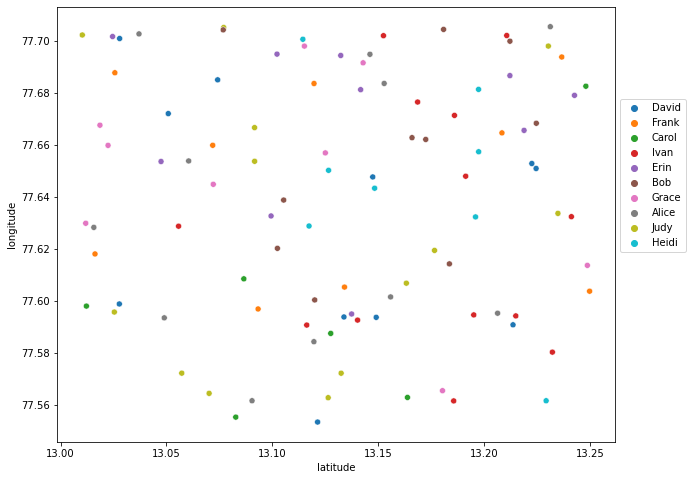

In [7]:
# scatterplot
plt.figure(figsize=(10,8))
# plt.scatter(x='latitude', y='longitude', data=df, hue='id')
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor=[1,0.8])
plt.show()

In [32]:
from sklearn.cluster import DBSCAN

def get_infected_names(input_name):

    epsilon = 0.018288 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names


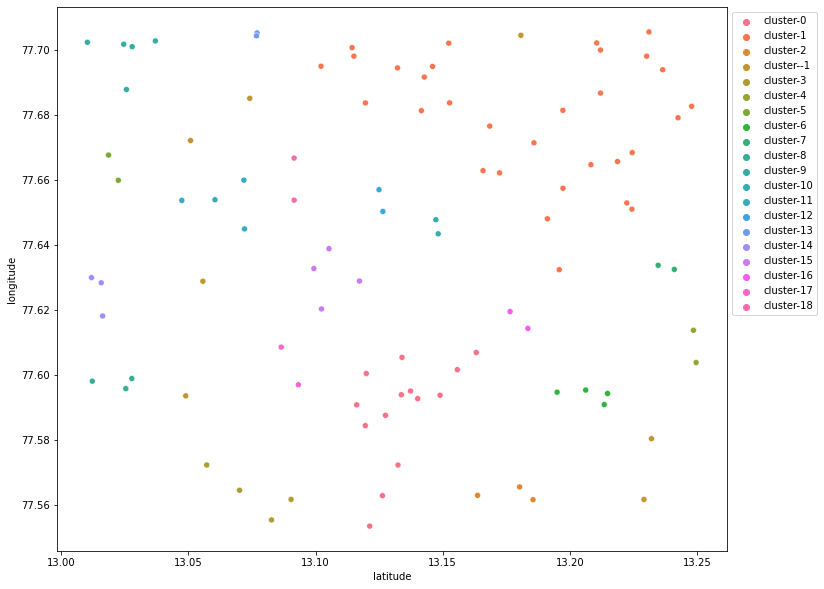

In [33]:
epsilon = 0.018288 # a radial distance of 6 feet in kilometers
model = DBSCAN(eps=epsilon, min_samples=2, metric='euclidean').fit(df[['latitude', 'longitude']])
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(x='latitude', y='longitude', data=df, hue = [f'cluster-{x}' for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

In [34]:
for name in df['id']:
    print(get_infected_names(name))


['Judy', 'Ivan', 'Alice', 'Carol', 'Erin', 'Bob', 'Frank', 'Grace', 'Heidi']
['Judy', 'Ivan', 'Alice', 'Carol', 'Erin', 'Bob', 'Frank', 'Grace', 'Heidi']
['David', 'Erin', 'Bob', 'Grace', 'Ivan', 'Carol', 'Heidi', 'Alice', 'Judy']
['Grace', 'Ivan', 'Alice', 'Judy', 'David', 'Frank', 'Erin', 'Bob', 'Heidi']
['Heidi', 'David', 'Frank', 'Erin', 'Bob', 'Grace', 'Carol', 'Alice', 'Judy']
['David', 'Frank', 'Bob', 'Grace', 'Ivan', 'Carol', 'Heidi', 'Alice', 'Judy']
['David', 'Frank', 'Erin', 'Grace', 'Ivan', 'Carol', 'Heidi', 'Alice', 'Judy']
['David', 'Frank', 'Erin', 'Bob', 'Ivan', 'Carol', 'Heidi', 'Alice', 'Judy']
['Judy', 'Carol', 'David', 'Frank', 'Erin', 'Bob', 'Grace', 'Ivan', 'Heidi']
['David', 'Erin', 'Bob', 'Grace', 'Ivan', 'Carol', 'Heidi', 'Alice', 'Judy']
['David', 'Erin', 'Bob', 'Grace', 'Ivan', 'Carol', 'Heidi', 'Alice', 'Judy']
['David', 'Frank', 'Erin', 'Bob', 'Ivan', 'Carol', 'Heidi', 'Alice', 'Judy']
['Judy', 'Ivan', 'Alice', 'Carol', 'Erin', 'Bob', 'Frank', 'Grace', 'Hei